In [113]:
# import the modules
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:.2f}'.format

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [114]:
# Code starts here
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(8241, 26)


,Unnamed: 0,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,3678,531817639,1,42.00,3,9.00,"$4,701",No,$0,Yes,...,1,Sports Car,no,$0,0,No,4,$0,9.00,1
1,2533,738075150,0,50.00,0,7.00,"$10,232",No,"$129,979",Yes,...,16,Minivan,no,"$5,458",2,No,3,$0,18.00,0
2,9169,176935775,0,40.00,2,17.00,"$66,200",Yes,"$223,960",z_No,...,13,z_SUV,no,$0,0,No,1,$629,9.00,1
3,4174,195054268,2,38.00,2,13.00,"$34,056",No,"$122,908",Yes,...,4,Sports Car,no,$502,1,No,5,$0,2.00,0
4,10150,764551255,0,38.00,0,nan,"$45,734",No,"$222,653",Yes,...,1,Pickup,no,"$3,296",1,No,3,"$2,156",2.00,1


In [115]:
y= train['CLAIM_FLAG']
train.drop(['ID','Unnamed: 0','CLAIM_FLAG'],1,inplace=True)

In [116]:
test = pd.read_csv('test.csv')
Id= test['Unnamed: 0'].copy()
test.drop(['ID','Unnamed: 0'],1,inplace=True)
test.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE
0,0,36.00,2,14.00,"$58,833",No,"$193,644",Yes,M,Bachelors,...,"$17,680",1,Van,yes,$0,0,Yes,2,"$4,611",11.00
1,0,47.00,0,nan,"$35,259",No,$0,z_No,M,Masters,...,"$12,850",4,Minivan,no,"$1,304",1,No,5,$0,14.00
2,0,48.00,0,11.00,"$126,442",No,$0,z_No,M,Masters,...,"$7,820",7,Pickup,yes,$0,0,No,0,$0,12.00
3,0,46.00,0,9.00,"$71,192",No,"$263,204",Yes,z_F,Masters,...,"$6,360",1,z_SUV,no,$0,0,No,0,$0,18.00
4,0,46.00,0,12.00,"$67,381",No,"$226,928",Yes,z_F,Masters,...,"$27,630",4,Pickup,no,"$6,149",3,No,4,$0,9.00


In [117]:
train[['MSTATUS','GENDER','EDUCATION','OCCUPATION','TRAVTIME','CAR_USE','BLUEBOOK','TIF']]

,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF
0,Yes,z_F,z_High School,Student,12,Private,"$5,900",1
1,Yes,z_F,Masters,Home Maker,33,Private,"$24,470",16
2,z_No,z_F,Bachelors,Manager,53,Private,"$17,260",13
3,Yes,z_F,z_High School,z_Blue Collar,29,Commercial,"$6,180",4
4,Yes,M,z_High School,Professional,5,Commercial,"$9,870",1
...,...,...,...,...,...,...,...,...
8236,Yes,M,<High School,z_Blue Collar,25,Commercial,"$10,250",1
8237,z_No,M,Masters,Lawyer,6,Private,"$13,140",10
8238,Yes,z_F,z_High School,Clerical,67,Private,"$18,950",6
8239,z_No,M,Masters,Professional,60,Commercial,"$24,230",1


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

In [118]:
train.describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
count,8241.00,8235.00,8241.00,7799.00,8241.00,8241.00,8241.00,8241.00,7726.00
mean,0.17,44.43,0.73,10.52,33.24,5.33,0.80,1.72,7.79
std,0.51,9.06,1.12,4.08,15.89,4.10,1.16,2.16,5.80
min,0.00,14.00,0.00,0.00,5.00,1.00,0.00,0.00,-1.00
25%,0.00,38.00,0.00,9.00,22.00,1.00,0.00,0.00,2.00
50%,0.00,45.00,0.00,11.00,33.00,4.00,0.00,1.00,8.00
75%,0.00,51.00,1.00,13.00,43.00,7.00,2.00,3.00,12.00
max,4.00,79.00,5.00,23.00,142.00,25.00,5.00,13.00,28.00


In [119]:
train.nunique()

KIDSDRIV         5
AGE             64
HOMEKIDS         6
YOJ             21
INCOME        6649
PARENT1          2
HOME_VAL      5157
MSTATUS          2
GENDER           2
EDUCATION        5
OCCUPATION       8
TRAVTIME        96
CAR_USE          2
BLUEBOOK      2803
TIF             23
CAR_TYPE         6
RED_CAR          2
OLDCLAIM      2922
CLM_FREQ         6
REVOKED          2
MVR_PTS         14
CLM_AMT       1941
CAR_AGE         30
dtype: int64

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    8241 non-null   int64  
 1   AGE         8235 non-null   float64
 2   HOMEKIDS    8241 non-null   int64  
 3   YOJ         7799 non-null   float64
 4   INCOME      7779 non-null   object 
 5   PARENT1     8241 non-null   object 
 6   HOME_VAL    7783 non-null   object 
 7   MSTATUS     8241 non-null   object 
 8   GENDER      8241 non-null   object 
 9   EDUCATION   8241 non-null   object 
 10  OCCUPATION  7711 non-null   object 
 11  TRAVTIME    8241 non-null   int64  
 12  CAR_USE     8241 non-null   object 
 13  BLUEBOOK    8241 non-null   object 
 14  TIF         8241 non-null   int64  
 15  CAR_TYPE    8241 non-null   object 
 16  RED_CAR     8241 non-null   object 
 17  OLDCLAIM    8241 non-null   object 
 18  CLM_FREQ    8241 non-null   int64  
 19  REVOKED     8241 non-null  

In [121]:
# Separate categorical columns and numerical columns 
cat_cols= train.select_dtypes(include='object').columns.tolist()
print('Categorical Columns:',cat_cols)
num_cols=train.select_dtypes(include=['number']).columns.tolist()
print('Numerical Columns:',num_cols)

Categorical Columns: ['INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'BLUEBOOK', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'REVOKED', 'CLM_AMT']
Numerical Columns: ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE']


In [122]:
# First let's remove $ sign value columns from and make them numerical columns
value_cols=['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']

In [123]:
def clean_dollar(df, column):
    new_df = df[column].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)
    return new_df

In [124]:
train['INCOME']= clean_dollar(train, 'INCOME')
train['HOME_VAL']= clean_dollar(train, 'HOME_VAL')
train['BLUEBOOK']= clean_dollar(train, 'BLUEBOOK')
train['OLDCLAIM']= clean_dollar(train, 'OLDCLAIM')
train['CLM_AMT']= clean_dollar(train, 'CLM_AMT')
train.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE
0,1,42.00,3,9.00,4701.00,No,0.00,Yes,z_F,z_High School,...,5900.00,1,Sports Car,no,0.00,0,No,4,0.00,9.00
1,0,50.00,0,7.00,10232.00,No,129979.00,Yes,z_F,Masters,...,24470.00,16,Minivan,no,5458.00,2,No,3,0.00,18.00
2,0,40.00,2,17.00,66200.00,Yes,223960.00,z_No,z_F,Bachelors,...,17260.00,13,z_SUV,no,0.00,0,No,1,629.00,9.00
3,2,38.00,2,13.00,34056.00,No,122908.00,Yes,z_F,z_High School,...,6180.00,4,Sports Car,no,502.00,1,No,5,0.00,2.00
4,0,38.00,0,nan,45734.00,No,222653.00,Yes,M,z_High School,...,9870.00,1,Pickup,no,3296.00,1,No,3,2156.00,2.00


In [125]:
test['INCOME']= clean_dollar(test, 'INCOME')
test['HOME_VAL']= clean_dollar(test, 'HOME_VAL')
test['BLUEBOOK']= clean_dollar(test, 'BLUEBOOK')
test['OLDCLAIM']= clean_dollar(test, 'OLDCLAIM')
test['CLM_AMT']= clean_dollar(test, 'CLM_AMT')

In [126]:
# Upate Separate categorical columns and numerical columns 
cat_cols= train.select_dtypes(include='object').columns.tolist()
print('Categorical Columns:',cat_cols)
num_cols=train.select_dtypes(include=['number']).columns.tolist()
print('Numerical Columns:',num_cols)

Categorical Columns: ['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED']
Numerical Columns: ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE']


In [127]:
# Lets Impute null values. Firstly checking for categorical columns
print(train[cat_cols].isnull().sum())
print(train[cat_cols].nunique())

PARENT1         0
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    530
CAR_USE         0
CAR_TYPE        0
RED_CAR         0
REVOKED         0
dtype: int64
PARENT1       2
MSTATUS       2
GENDER        2
EDUCATION     5
OCCUPATION    8
CAR_USE       2
CAR_TYPE      6
RED_CAR       2
REVOKED       2
dtype: int64


In [128]:
# Lets Impute null values. Firstly checking for categorical columns
print(test[cat_cols].isnull().sum())
print(test[cat_cols].nunique())

PARENT1         0
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    135
CAR_USE         0
CAR_TYPE        0
RED_CAR         0
REVOKED         0
dtype: int64
PARENT1       2
MSTATUS       2
GENDER        2
EDUCATION     5
OCCUPATION    8
CAR_USE       2
CAR_TYPE      6
RED_CAR       2
REVOKED       2
dtype: int64


In [129]:
train['OCCUPATION'].value_counts()

z_Blue Collar    1820
Clerical         1272
Professional     1135
Manager          1020
Lawyer            828
Student           710
Home Maker        659
Doctor            267
Name: OCCUPATION, dtype: int64

In [130]:
# Adding an 'Unknown' class to occupation. 
train['OCCUPATION']= train['OCCUPATION'].fillna("Unknown")
print(train['OCCUPATION'].value_counts())
test['OCCUPATION']= test['OCCUPATION'].fillna("Unknown")
test['OCCUPATION'].value_counts()

z_Blue Collar    1820
Clerical         1272
Professional     1135
Manager          1020
Lawyer            828
Student           710
Home Maker        659
Unknown           530
Doctor            267
Name: OCCUPATION, dtype: int64


z_Blue Collar    468
Clerical         318
Professional     273
Manager          237
Lawyer           203
Student          189
Home Maker       184
Unknown          135
Doctor            54
Name: OCCUPATION, dtype: int64

In [131]:
# For numerical columns
print(train[num_cols].isnull().sum())
print(train[num_cols].nunique())

KIDSDRIV      0
AGE           6
HOMEKIDS      0
YOJ         442
INCOME      462
HOME_VAL    458
TRAVTIME      0
BLUEBOOK      0
TIF           0
OLDCLAIM      0
CLM_FREQ      0
MVR_PTS       0
CLM_AMT       0
CAR_AGE     515
dtype: int64
KIDSDRIV       5
AGE           64
HOMEKIDS       6
YOJ           21
INCOME      6649
HOME_VAL    5157
TRAVTIME      96
BLUEBOOK    2803
TIF           23
OLDCLAIM    2922
CLM_FREQ       6
MVR_PTS       14
CLM_AMT     1941
CAR_AGE       30
dtype: int64


In [132]:
print(test[num_cols].isnull().sum())
print(test[num_cols].nunique())

KIDSDRIV      0
AGE           1
HOMEKIDS      0
YOJ         106
INCOME      108
HOME_VAL    117
TRAVTIME      0
BLUEBOOK      0
TIF           0
OLDCLAIM      0
CLM_FREQ      0
MVR_PTS       0
CLM_AMT       0
CAR_AGE     124
dtype: int64
KIDSDRIV       5
AGE           60
HOMEKIDS       6
YOJ           20
INCOME      1746
HOME_VAL    1327
TRAVTIME      84
BLUEBOOK    1371
TIF           21
OLDCLAIM     777
CLM_FREQ       6
MVR_PTS       11
CLM_AMT      544
CAR_AGE       28
dtype: int64


In [133]:
impute_num_cols= ['AGE','YOJ','INCOME','HOME_VAL','CAR_AGE']

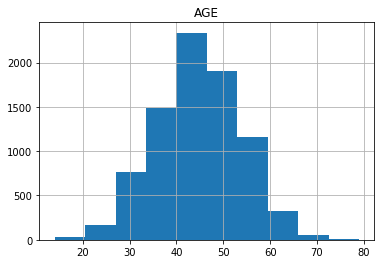

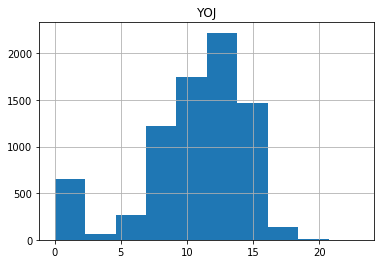

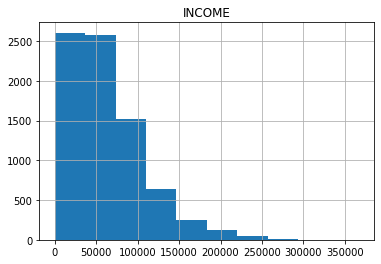

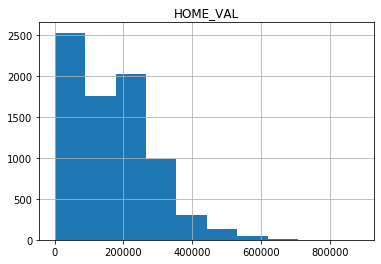

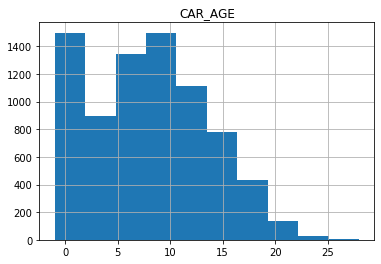

In [134]:
# Check the distribution of certain columns you might find of interest. 
# This can be done by calling the plot_distribution(). 
for column in impute_num_cols:
    train[column].hist()
    plt.title(column)
    plt.show()

In [135]:
train[impute_num_cols].describe()

,AGE,YOJ,INCOME,HOME_VAL,CAR_AGE
count,8235.00,7799.00,7779.00,7783.00,7726.00
mean,44.43,10.52,61847.20,155598.10,7.79
std,9.06,4.08,47438.63,129447.45,5.80
min,14.00,0.00,0.00,0.00,-1.00
25%,38.00,9.00,27994.50,0.00,2.00
50%,45.00,11.00,53899.00,162237.00,8.00
75%,51.00,13.00,86266.00,239222.50,12.00
max,79.00,23.00,367030.00,885282.00,28.00


In [137]:
from sklearn.impute import SimpleImputer

In [138]:
# to treat missing values

def treat_null_values(df, df1,column, method):
    imputer = SimpleImputer(missing_values=np.nan, strategy=method)
    imputer= imputer.fit(df[[column]])
    new_df= imputer.transform(df[[column]])
    new_df1= imputer.transform(df1[[column]])
    return pd.DataFrame(new_df), pd.DataFrame(new_df1)   

In [139]:
train['AGE'],test['AGE']= treat_null_values(train,test,'AGE','most_frequent')

In [140]:
train['YOJ'],test['YOJ']= treat_null_values(train,test,'YOJ', 'most_frequent')
train['CAR_AGE'],test['CAR_AGE']= treat_null_values(train,test,'CAR_AGE', 'most_frequent')
train['HOME_VAL'],test['HOME_VAL']= treat_null_values(train,test,'HOME_VAL', 'mean')
train['INCOME'],test['INCOME']= treat_null_values(train,test,'INCOME', 'mean')

In [141]:
print(train.isnull().sum())

KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
dtype: int64


In [142]:
print(test.isnull().sum())

KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
dtype: int64


In [146]:
#Encoding the remaining Categorical Columns
# Upate Separate categorical columns and numerical columns 
cat_cols= train.select_dtypes(include='object').columns.tolist()
print('Categorical Columns:',cat_cols)
print(train[cat_cols].nunique())

Categorical Columns: ['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED']
PARENT1       2
MSTATUS       2
GENDER        2
EDUCATION     5
OCCUPATION    9
CAR_USE       2
CAR_TYPE      6
RED_CAR       2
REVOKED       2
dtype: int64


In [147]:
print(test[cat_cols].nunique())

PARENT1       2
MSTATUS       2
GENDER        2
EDUCATION     5
OCCUPATION    9
CAR_USE       2
CAR_TYPE      6
RED_CAR       2
REVOKED       2
dtype: int64


In [144]:
import category_encoders as ce

In [148]:
# Binary Encoder on Categorical Columns
for col in cat_cols:
    encoder  =  ce.BinaryEncoder(cols=[col])
    train =  encoder.fit_transform(train)
    test =  encoder.transform(test)

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [149]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE

from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

#Under Sampling
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
#Tomek Undersampling
from imblearn.under_sampling import TomekLinks
# SMOTE Over-sampling
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [154]:
# Code Starts here


for n in [4]:
    X_train, X_test, y_train, y_test = train_test_split(train,y, random_state = 2, test_size = 0.15)
    #scaler = StandardScaler()
    #X_train = scaler.fit_transform(X_train)
    #X_test = scaler.transform(X_test)
    
    #poly = PolynomialFeatures(2)
    #X_train = poly.fit_transform(X_train)
    #X_test = poly.transform(X_test)
    
    #Initialising Random Forest Classifier with appropriate parameters
    clf = RandomForestClassifier(min_samples_split = n,random_state = 0, criterion = 'entropy')
    #clf = RandomForestClassifier(random_state=2,n_estimators=350,max_depth=35,max_features=35,min_samples_split=4)
    
    #anova = SelectKBest(score_func = f_regression,  k = n)
    #X_train = anova.fit_transform(X_train,y_train)
    #X_test = anova.transform(X_test)
    
    #Parameter grid
    #parameter_grid = {"max_depth": [2,3,None], "max_features": [1,3,10,11], "min_samples_leaf": [10,20,50], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}
    
    # Randomized search
    #clf_rlf= RandomForestClassifier(random_state=0)
    #clf= RandomizedSearchCV(estimator=clf_rlf,param_distributions=parameter_grid,n_iter=20,random_state=0)
    #clf.fit(X_train,y_train)
    
    # Grid Search
    #clf_rlf= RandomForestClassifier(random_state=0)
    #clf= GridSearchCV(estimator=clf_rlf, param_grid=parameter_grid)
    #clf.fit(X_train,y_train)
    
    #Initialising bagging with appropriate parameters
    #clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, random_state=0)
    
    #Initialising pasting with appropriate parameters
    #clf= BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,max_samples=100,bootstrap=False,random_state=0)
    
    smote= SMOTE(random_state=0)
    X_sample3, y_sample3 = smote.fit_sample(X_train, y_train)
    clf.fit(X_sample3,y_sample3)
    
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    print(accuracy_score(y_test, y_pred))
    print("----------------------")


0.9982866933181039
0.8504446240905417
0.8504446240905417
----------------------


In [155]:
accuracy= clf.score(X_test,y_test)
print("Accuracy is", accuracy)
recall= recall_score(y_test,y_pred)
print('Recall score is', recall)
precision= precision_score(y_test,y_pred)
print('Precision is',precision)
f1= f1_score(y_test,y_pred)
print('f1 score is',f1)
confusion_mat= confusion_matrix(y_test,y_pred)
print('Confusion Matrix \n', confusion_mat)
cf= confusion_matrix(y_test, y_pred)
tp= cf[0,0]
fn= cf[1,0]
tn= cf[1,1]
fp= cf[0,1]
print("TP=",tp)
print("FP=",fp)
print("FN=",fn)
print("TN=",tn)

Accuracy is 0.8504446240905417
Recall score is 0.6974595842956121
Precision is 0.848314606741573
f1 score is 0.7655259822560203
Confusion Matrix 
 [[750  54]
 [131 302]]
TP= 750
FP= 54
FN= 131
TN= 302


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [156]:
#### Run Model
#test = scaler.transform(test)
#test = poly.transform(test)
pred= clf.predict(test)

In [1]:
submission = pd.DataFrame({'Unnamed: 0': Id, 'CLAIM_FLAG': pred})
submission

NameError: name 'pd' is not defined

In [158]:
submission['CLAIM_FLAG'].value_counts()

0    1505
1     556
Name: CLAIM_FLAG, dtype: int64

In [159]:
submission.to_csv('First_Submission_RFC.csv', index = False)